# Probability Distributions

A random variable is a measurement whose observed values are the outcomes of a random experiment. There are two types of probability distributions corresponding to the two kinds of random variables:

1. Discrete probability distributions: These specify the chance of observing a small countable number of possible values.
2. Continuous probability distributions: These handle cases were all possible (real) numbers can be observed.

Expression
---
The following relation represents a random vaiable, (*r.v.*):
$$ X(\omega)=x$$
where $X$ is r.v., $\omega$ is outcome of obseration, and $x$ the real value. 



|Distribution	|	Function(arguments)|
|:---:|:---:|
|beta	|	beta(shape1, shape2, ncp)|
|binomial	|	binom(size, prob)|
|chi-squared	|	chisq(df, ncp)|
|exponential	|	exp(rate)|
|gamma	|	gamma(shape, scale)|
|logistic	|	logis(location, scale)|
|normal	|	norm(mean, sd)|
|Poisson	|	pois(lambda)|
|Student's t	|	t(df, ncp)|
|uniform	|	unif(min, max)|

- d*xxx*(x,) returns the density or the value on the y-axis of a probability distribution for a discrete value of x

- p*xxx*(q,) returns the cumulative density function (CDF) or the area under the curve to the left of an x value on a probability distribution curve

- q*xxx*(p,) returns the quantile value, i.e. the standardized z value for x

- r*xxx*(n,) returns a random simulation of size n

Discrete r.v.'s
===

1. Bernoulli's r.v.
---
$$X(\omega)=\cases{1,\hbox{ with probability $p$ if $\omega$ success,}\\
             0, \hbox{ with probabiliy $(1-p)$ if $\omega$  fail,}}$$
with its probability density function as follows:
$$f_X(1)={\cal P}(X=1)= p \hbox{ and } f_X(0)={\cal P}(X=0)= 1-p$$              
- mean ($\mu$) = $E_X(X)=\sum_xx\cdot f_X(x)=p\cdot1+(1-p)\cdot0=p$,   
- variance ($\sigma^2$):
\begin{eqnarray}
(\sigma^2) &=& E_X(X-\mu)^2\\
                             &=& E_X X^2-2\mu E_XX+\mu^2\\
                             &=& E_XX^2-2\cdot\mu\cdot\mu+\mu^2\\
                             &=& E_XX^2-\mu^2\\
                             &=& 1^2\cdot p-p^2=p(1-p)
\end{eqnarray}                             

2. The binomial r.v.
---
Suppose that $X_1,X_2,\cdots,X_n$ are independent identically distrituted Bernoulli's r.v.'s. Then
$$ X=\sum_{i=1}^n X_i$$
is a binomial r.v with its probability density function as follows:

$${\cal P}(X=k)=f_X(k)=C^n_k p^k(1-p)^{n-k}$$

- mean ($\mu$):
$$ E X= E \sum_{i=1}^n X_i=\sum_{i=1}^n E X_i= \sum_{i=1}^np=np$$
- variance ($\sigma^2$):
\begin{eqnarray}
(\sigma^2) &=& E_X(X-\mu)^2\\
           &=& E_X\left(\sum_{i=1}^n  X_i-np\right)^2\\
           &=& E_X\left(\sum_{i=1}^n ( X_i-p)^2\right)+2E_X\left(\sum_{i\ne j}( X_i-p)(X_j-p)\right)\\
           &=& \sum_{i=1}^nE_X( X_i-p)^2+2\sum_{i\ne j}E_X( X_i-p)(X_j-p)\\
           &=& \sum_{i=1}^np(1-p)+2\sum_{i\ne j}E_X( X_i-p)E_X(X_j-p)\hbox{ (reference following)}\\
           &=& np(1-p)+2\sum_{i\ne j}(p-p)(p-p)\\
           &=& np(1-p)
\end{eqnarray}   
Here, we use the fact:
$$ E (X\cdot Y)= EX\cdot EY$$
if $X$ and $Y$ are independent.

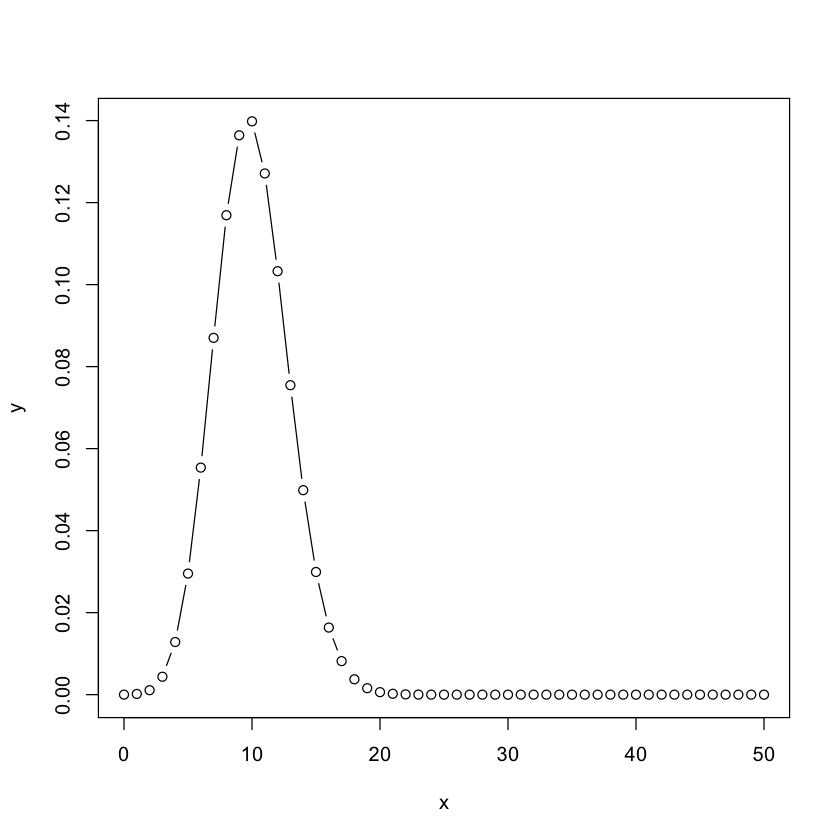

In [2]:
# Binomial(n=50,p=0.2)
x <- seq(0,50,by=1)
y <- dbinom(x,50,0.2)
plot(x,y,type="b")


- p*xxx*(x,)=${\cal P}(X\le x)$
- q*xxx*(x,)=${\cal P}(X> x)$
- r*xxx*(n,): generate $n$ random data.

[1] 0.9999979

[1] 10

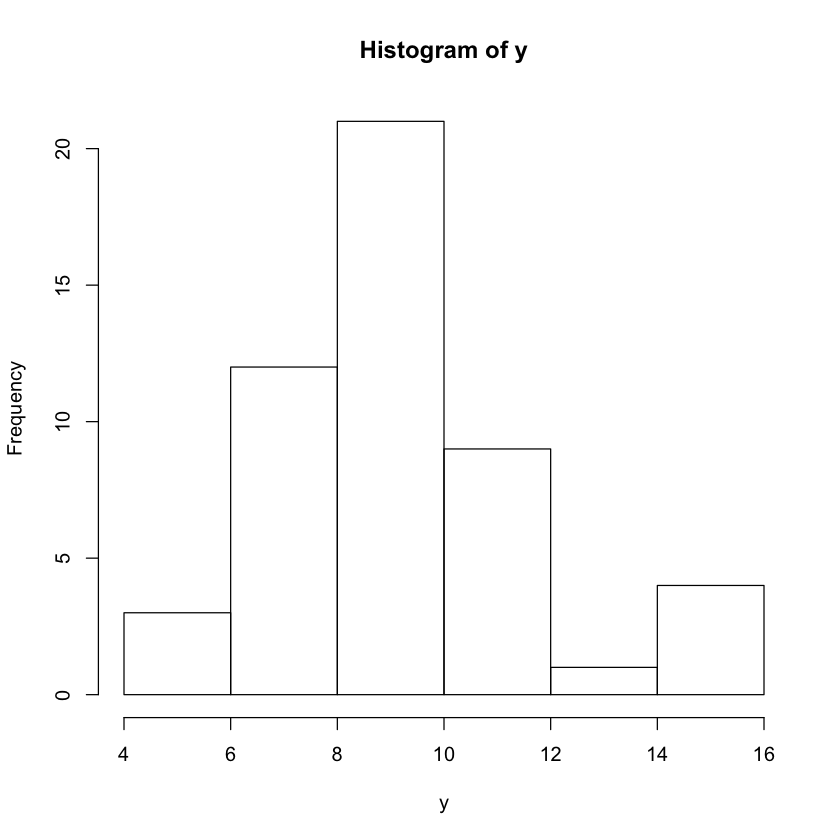

In [41]:
# the cumulative probability distribution function
pbinom(24,50,0.2)
qbinom(0.5,50,0.2)
y=rbinom(50,50,.2)
hist(y)

Poisson $r.v$.
---
with $p.d.f$., $\lambda > 0$:
  $$ f_X (x ; \lambda) = \frac{e^{- \lambda}}{x!} \lambda^x \hbox{ where } x =
     0, 1, 2, \cdots $$
- mean=$\lambda$:
\begin{eqnarray*}
    {\mu} & = & \sum_{x = 0}^{\infty} x \frac{e^{- \lambda}}{x!}
    \lambda^x\\
    & = & \sum_{x = 1}^{\infty} x \frac{e^{- \lambda}}{x!} \lambda^x\\
    & = & \sum_{x = 1}^{\infty}  \frac{e^{- \lambda}}{(x - 1) !} \lambda^{x -
    1} \lambda\\
    & = & \lambda \sum_{x = 0}^{\infty}  \frac{e^{- \lambda}}{x!} \lambda^x\\
    & = & \lambda e^{- \lambda} e^{\lambda}\\
    & = & \lambda
\end{eqnarray*}    
- variance=$\lambda$:
\begin{eqnarray*}
    \sigma^2 & = & \sum_{x = 0}^{\infty} (x - \lambda)^2  \frac{e^{-
    \lambda}}{x!} \lambda^x\\
    & = & \sum_{x = 0}^{\infty} (x^2 - 2 \lambda x + \lambda)  \frac{e^{-
    \lambda}}{x!} \lambda^x\\
    & = & \sum_{x = 0}^{\infty} ({\color{blue} x (x - 1)} + {\color{orange} x
    - 2 \lambda x} + {\color{brown} \lambda^2})  \frac{e^{- \lambda}}{x!}
    \lambda^x\\
    & = & \sum_{x = 2}^{\infty} {\color{blue} (x (x - 1))} \frac{e^{-
    \lambda}}{x!} \lambda^x + {\color{orange} (1 - 2 \lambda)} \sum_{x =
    0}^{\infty} {\color{orange} x}  \frac{e^{- \lambda}}{x!} \lambda^x +
    {\color{brown} \lambda^2}\\
    & = & {\color{blue} \lambda^2} + {\color{orange} (1 - 2 \lambda) \lambda}
    + {\color{brown} \lambda^2}\\
    & = & \lambda
  \end{eqnarray*}     

Here we use the known fact:
  $$ e^{\lambda} = \sum_{x = 0}^{\infty}  \frac{1}{x!} \lambda^x $$     

Problem
---
If there are twelve cars crossing a bridge per minute on average, find the probability of having seventeen or more cars crossing the bridge in a particular minute.

Solution

The probability of having sixteen or less cars crossing the bridge in a particular minute is given by the function ppois.

In [12]:
cat(sprintf("Prob(X<=16)=%.3f",ppois(16, lambda=12) )  )# lower tail 

Prob(X<=16)=0.899

In [14]:
cat(sprintf("Prob(X>16)=%.3f",ppois(16, lambda=12, lower=FALSE) )  ) 

Prob(X>16)=0.101

## Continuous Random Variables

Uniform r.v.
---
 $U[0,1]$ on [0,1]:
  $$ f_X (x) = 1 \text{ for } x \in [0, 1] $$
  And
  \begin{eqnarray*}
    {\mu} & = & \int^1_0 x \cdot 1 \cdot d x\\
    & = & 1 / 2\\
    \sigma^2 & = & \int^1_0 \left( x - \frac{1}{2} \right)^2 d x\\
    & = & \frac{1}{12}
  \end{eqnarray*}

In [17]:
U01 <- function(x) 1.0
    
integrate(Vectorize(U01),0,1)
integrate(dunif,0,1)

1 with absolute error < 1.1e-14

1 with absolute error < 1.1e-14

$Y= a+(b-a)X\sim U[a,b]$ with p.d.f. 
$$f_Y(y)=\frac{1}{b-a}$$
if $X\sim U[0,1]$

In [1]:
# U[-1,2]
a <- (-1)
b <- 2
Uab<- function(x) 1/(b-a)
integrate(Vectorize(Uab),a,b)  

1 with absolute error < 1.1e-14

In [2]:
dunif(x,min=a,max=b)


ERROR: Error in dunif(x, min = a, max = b): 找不到物件 'x'


In [3]:
help(dunif)

Uniform {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
"min, max",lower and upper limits of the distribution. Must be finite.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x]."


Exponential r.v.'s
---
' Exponential r.v. with parameter $\lambda > 0$:
  $$ f_X (x) = \lambda e^{- \lambda x}  \text{ for } x > 0 $$
  Then
  \begin{eqnarray*}
    {\mu} & = & \int^{\infty}_0 x \cdot \lambda e^{- \lambda x} d x\\
          &=& 1 / \lambda \int^{\infty}_0 (\lambda x) \cdot \lambda e^{- \lambda x} d (\lambda x) \\
    & = & \Gamma(2) / \lambda=1/\lambda\\
    \sigma^2 & = & \int^{\infty}_0 \left( x - \frac{1}{\lambda} \right)^2
    \cdot \lambda e^{- \lambda x} d x\\
    & = & \int^{\infty}_0 \left( x^2 - 2\frac{x}{\lambda}+\lambda^{-2} \right)
    \cdot \lambda e^{- \lambda x} d x\\
    &=& \frac{\Gamma(3)}{\lambda^2}-2 \frac{\Gamma(2)}{\lambda^2}+ \frac{\Gamma(1)}{\lambda^2}\\
    & = & 1 / \lambda^2
  \end{eqnarray*}
  
Note
---
Here we have the result of Gamma function:
$$\Gamma(n)=\int^\infty_0x^{n-1}e^{-x} d x=(n-1)!$$

In [29]:
pexp(Inf, rate=1/3) 

[1] 1

Problem
---
Suppose the mean checkout time of a supermarket cashier is three minutes. Find the probability of a customer checkout being completed by the cashier in less than two minutes.

Solution
---

The checkout processing rate is equals to one divided by the mean checkout completion time.
Hence,
$$\hbox{Mean}=\frac{1}{\lambda}=3\to \lambda=\frac{1}{3}$$
i.e. the processing rate is 1/3 checkouts per minute. We then apply the function pexp of the exponential distribution with rate=1/3.


In [30]:
cat(sprintf("Probability P(X<=2) = %0.3f",pexp(2, rate=1/3)) )

Probability P(X<=2) = 0.487

  Normal r.v. 
  ---
  $N(0,1)$ with parameters ${\mu}= 0$ and $\sigma^2 = 1$:
  $$ f_X (x ; 0, 1) = \frac{1}{\sqrt{2 \pi}} e^{- \frac{x^2}{2}} $$
  Then
  \begin{eqnarray*}
    {\mu} & = & \int^{\infty}_{- \infty} x \frac{1}{\sqrt{2 \pi}} e^{-
    \frac{x^2}{2}} d x\\
    & = & 0 \text{ (since integrand is odd!)}\\
    \sigma^2 & = & \int^{\infty}_{- \infty} x^2  \frac{1}{\sqrt{2 \pi}} e^{-
    \frac{x^2}{2}} d x\\
    & = & 1
  \end{eqnarray*}

 Normal r.v., $N(\mu,\sigma^2)$, with parameters ${\mu}$ and $\sigma^2$:

  $$ f_X (x ; {\mu}, \sigma^2) = \frac{1}{\sqrt{2 \pi} \sigma} \exp{-\frac{(x-\mu)^2}{2\sigma^2}} $$
  Then
  \begin{eqnarray*}
    {\mu} & = & \int^{\infty}_{- \infty} x \frac{1}{\sqrt{2 \pi} \sigma}
    e^{- \frac{(x -{\mu})^2}{2 \sigma^2}} d x\\
    & = & \int^{\infty}_{- \infty} (x -{\mu}+{\mu})  \frac{1}{\sqrt{2
    \pi} \sigma} e^{- \frac{(x -{\mu})^2}{2 \sigma^2}} d x\\
    & = & {\mu}\\
    \sigma^2 & = & \int^{\infty}_{- \infty} (x -{\mu})^2  \frac{1}{\sqrt{2
    \pi} \sigma} e^{- \frac{(x -{\mu})^2}{2 \sigma^2}} d x\\
    & = & \sigma^2
  \end{eqnarray*}

There is a usrful function, called moment generating funiction:
\begin{eqnarray*}
  \phi (t) & = & E e^{t X}\\
  & = & \left\{ \begin{array}{ll}
    \sum_x e^{t x} f_X (x) & \text{ if } X \text{ is discrete } ;\\
    \int_{\mathbf{R}} e^{t x} f_X (x) d x & \text{ if } X \text{ is continuous}
  \end{array} \right.
\end{eqnarray*}


**Theorem** The moment generating function of every distribution is unique. 

  $\phi (t)$ of r.v., $N ({\mu}, \sigma^2) $ :
  \begin{eqnarray*}
    \phi (t) & = & \int_{\mathbf{R}} e^{t x} \frac{1}{\sqrt{2 \pi} \sigma}
    e^{- \frac{(x -{\mu})^2}{2 \sigma^2}} d x\\
    & = & \int_{\mathbf{R}} \frac{1}{\sqrt{2 \pi} \sigma} e^{- \frac{x^2 -
    2{\mu}x - 2 \sigma^2 t x -{\mu}^2}{2 \sigma^2}} d x\\
    & = & \int_{\mathbf{R}} \frac{1}{\sqrt{2 \pi} \sigma} e^{- \frac{(x
    -{\mu}- \sigma^2 t)^2}{2 \sigma^2}} \cdot e^{\frac{({\mu}+
    \sigma^2 t)^2 -{\mu}^2}{2 \sigma^2}} d x\\
    & = & e^{\frac{({\mu}+ \sigma^2 t)^2 -{\mu}^2}{2 \sigma^2}}\\
    & = & e^{{\mu}t + \sigma^2 t^2 / 2}
  \end{eqnarray*}




We can find out any moment of r.v. from $\phi (t)$ as follows：
\begin{eqnarray*}
  \phi' (t) = (E  e^{t X})' = E X e^{t X} & \Rightarrow & \phi' (0) = E X\\
  \phi'' (t) = E X^2 e^{t X} & \Rightarrow & \phi'' (0) = E X^2
\end{eqnarray*}
for $N ({\mu}, \sigma^2)$ r.v.:
\begin{eqnarray*}
  \phi (t) & = & e^{{\mu}t + \sigma^2 t^2 / 2}\\
  & \Downarrow & \\
  \phi' (t) & = & ({\mu}+ \sigma^2 t) e^{{\mu}t + \sigma^2 t^2 / 2}\\
  & \Downarrow & \\
  E X & = & \phi' (0) ={\mu}\\
  \phi'' (t) & = & \sigma^2 e^{{\mu}t + \sigma^2 t^2 / 2} + ({\mu}+
  \sigma^2 t)^2 e^{{\mu}t + \sigma^2 t^2 / 2}\\
  & \Downarrow & \\
  E X^2 & = & \sigma^2 +{\mu}^2\\
  & \Downarrow & \\
  E (X -{\mu})^2 & = & E X^2 -{\mu}^2 = \sigma^2
\end{eqnarray*}
just as like results above.

dnorm(x)=$\frac{\exp(-x^2)}{\sqrt{2\pi}}$

In [46]:
sqrt(2*pi)*dnorm(0)

[1] 1

In [48]:
dnorm(0,mean=0,sd=1)
1/sqrt(2*pi)

[1] 0.3989423

[1] 0.3989423

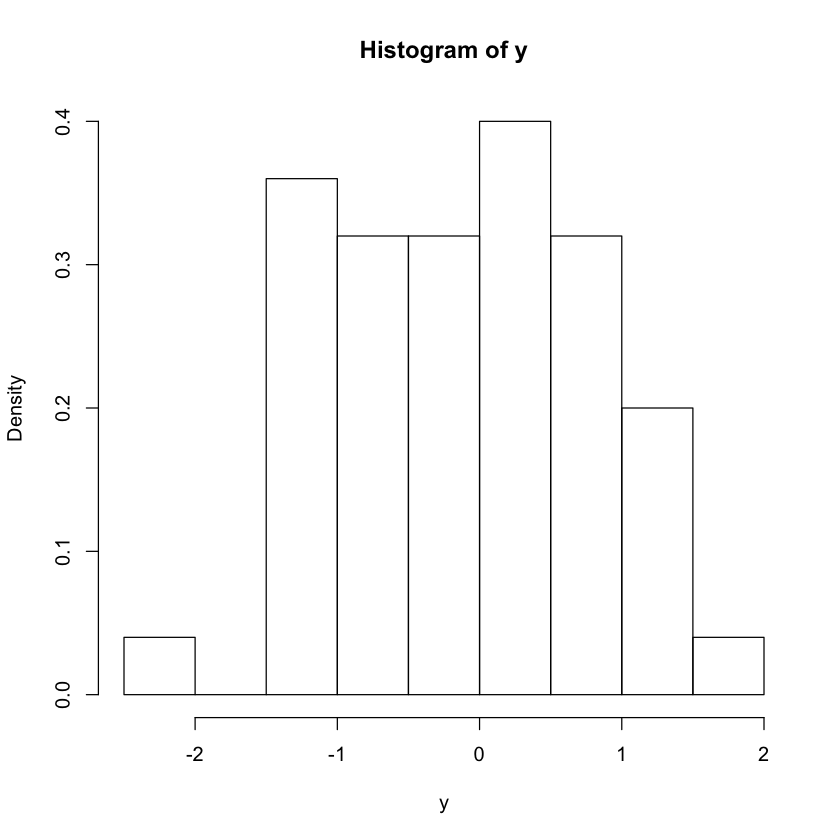

In [58]:
y <- rnorm(50,mean=0,sd=1)
hist(y,freq=FALSE)


In [60]:
mean(y)
sd(y)

[1] -0.08146513

[1] 0.8666607

Problem
---
Assume that the test scores of a college entrance exam fits a normal distribution. Furthermore, the mean test score is 72, and the standard deviation is 15.2. What is the percentage of students scoring 84 or more in the exam?

Solution
---
We apply the function pnorm of the normal distribution with mean 72 and standard deviation 15.2. Since we are looking for the percentage of students scoring higher than 84, we are interested in the upper tail of the normal distribution.



In [31]:
pnorm(84, mean=72, sd=15.2, lower.tail=FALSE) 

[1] 0.2149176

Central Limit Theorem
---
$$\frac{N(\mu,\sigma^2)-\mu}{\sigma}\sim N(0,1)$$

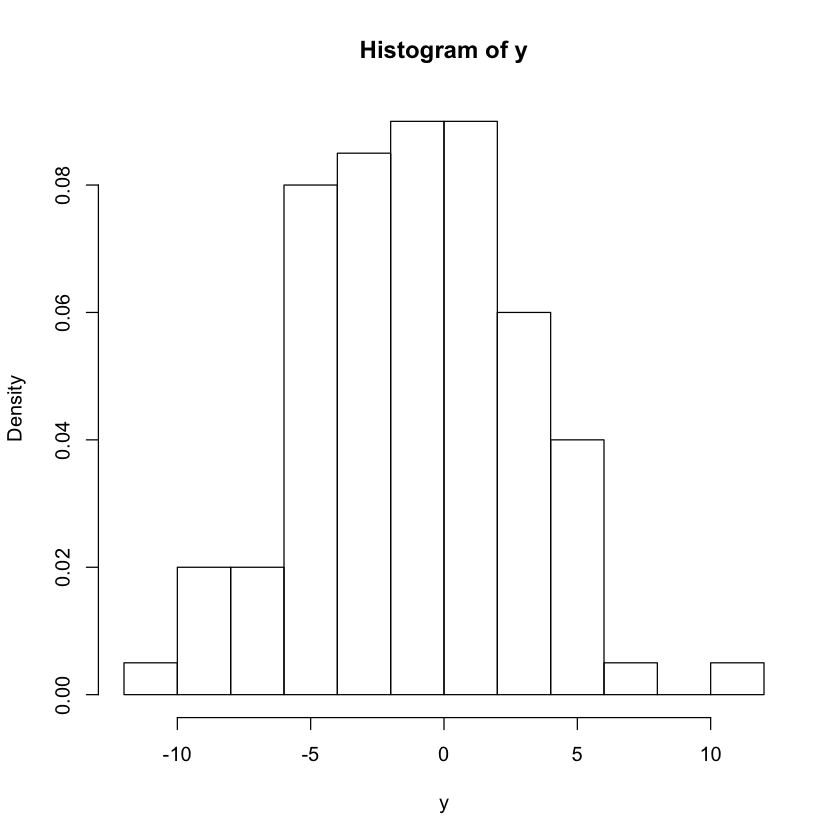

In [61]:
y <- rnorm(100,mean=-1,sd=4)
hist(y,freq=FALSE)


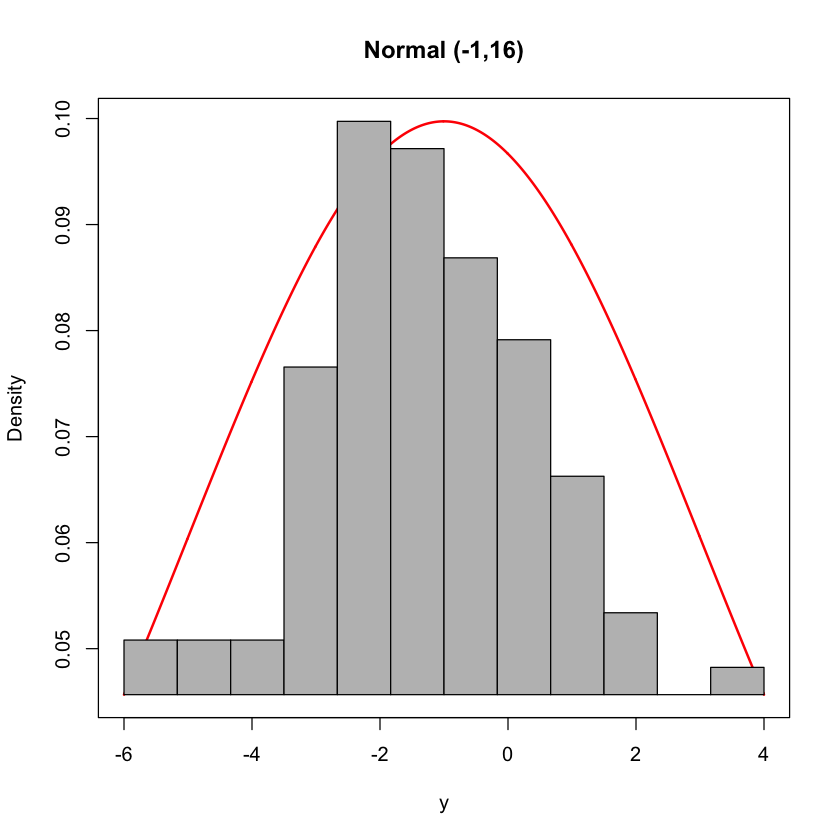

In [86]:
mu <- -1; sigma <- 4 
x <- seq(-6, 4, .01) 
fx <- (1/sqrt(2*pi*sigma^2))*exp(-(x-mu)^2/(2*sigma^2))
plot(x, fx, type = "l", col='red',lwd = 2,xlab="",ylab="")  
y <- rnorm(100,mean=-1,sd=4)
# put pictures together
par(new = TRUE)
# freq (FALSE)-> pdf, axes (False) -> without display 
hist(y,freq=FALSE,axes=FALSE,main="Normal (-1,16)",col='gray')


In [62]:
mean(y)
sd(y)

[1] -1.2179

[1] 3.906202

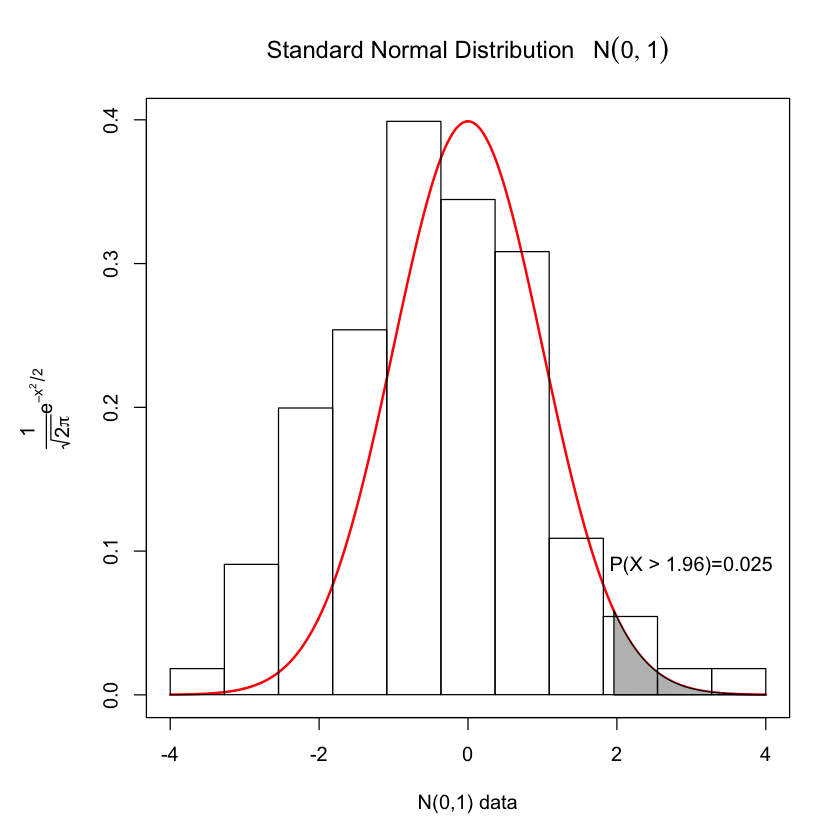

In [121]:
oldpar <- par(mar = c(5, 6, 4, 2) + 0.1) 
mu <- 0; sigma <- 1 
x <- seq(-4, 4, .01) 
fx <- (1/sqrt(2*pi*sigma^2))*exp(-(x-mu)^2/(2*sigma^2))
# same as fx <-dnorm(x)
plot(x, fx, type = "l", col='red',lwd = 2,xlab="",
        ylab=expression(frac(1,sqrt(2*pi))* e^{-x^2/2})) 

x0 <- x[x >= 1.96]    # define region to fill
x0 <- c(x0[1], x0) ;  fx0 <- fx[x >= 1.96]
fx0 <- c(0, fx0)
text(3,0.09,"P(X > 1.96)=0.025")
polygon(x0, fx0, col="gray")

y <- rnorm(100,mean=-1,sd=4)
z <- (y-(-1))/4
par(new = TRUE)
hist(z,freq=FALSE,axes=FALSE,main=expression("Standard Normal Distribution "~~ N(0,1)),
       xlab="N(0,1) data", ylab="")

In [66]:
mean(z)
sd(z)

[1] -0.05447495

[1] 0.9765506

In [35]:
integrate(dnorm,1.96,Inf)

0.0249979 with absolute error < 1.9e-05

In [36]:
qnorm(1-0.025)

[1] 1.959964

Chi-squared ($\chi^2$) Distribution
--
If $X_1,X_2,\cdots,X_n$ are $n$ independent random variables having the standard normal distribution, then the following quantity follows a Chi-Squared distribution with $n$ degrees of freedom. Its mean is $n$, and its variance is $2n$.

$$V_n=\chi_n^2 = X_1^2 + X_2^2 + \cdots+ X^2_n$$


Problem
---
Find the 2.5th and 97.5th percentiles of the Student t distribution with 5 degrees of freedom.

Solution
---
We apply the quantile function qt of the Student t distribution against the decimal values 0.025 and 0.975.


In [32]:
qt(c(.025, .975), df=5)   # 5 degrees of freedom 

[1] -2.570582  2.570582

$F$ Distribution
---
If $\chi_1^2$ and $\chi_2^2$ are two independent random variables having the Chi-Squared distribution with $m$ and $n$ degrees of freedom respectively, then the following quantity follows an F distribution with m1 numerator degrees of freedom and m2 denominator degrees of freedom, i.e., $(m,n)$ degrees of freedom.

$$F(m,n)\sim \frac{\chi_1^2/m}{\chi_2^2/n}$$

Problem
---
Find the 95th percentile of the F distribution with (5, 2) degrees of freedom.

Solution
---
We apply the quantile function qf of the F distribution against the decimal value 0.95.


In [33]:
 qf(.95, df1=5, df2=2) 

[1] 19.29641